In [2]:
# Task 2: Credit Risk Prediction
# -----------------------------------
# 🔹 Import Required Libraries
# -----------------------------------
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning Libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Display Settings
pd.set_option('display.max_columns', None)
sns.set(style="whitegrid")

print("✅ Libraries imported successfully.")


✅ Libraries imported successfully.


In [4]:
# -----------------------------------
# 🔹 Load Dataset
# -----------------------------------
df = pd.read_csv("train.csv")   # make sure 'train.csv' is in the same folder as your notebook

# Basic Info
print("Dataset Shape:", df.shape)
print("\nColumns:", df.columns.tolist())
print("\nFirst 5 Rows:")
display(df.head())

# Summary
print("\nSummary Statistics:")
display(df.describe())

# Missing values check
print("\nMissing Values in Each Column:")
print(df.isnull().sum())


Dataset Shape: (614, 13)

Columns: ['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status']

First 5 Rows:


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y



Summary Statistics:


,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000



Missing Values in Each Column:
Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64


In [10]:
# -----------------------------------
# 🔹 Data Cleaning & Handling Missing Values (Updated)
# -----------------------------------

# Fill missing categorical values with mode (no inplace warning)
for col in ["Gender", "Married", "Dependents", "Self_Employed", "Credit_History"]:
    df[col] = df[col].fillna(df[col].mode()[0])

# Fill missing numerical values with median
df["LoanAmount"] = df["LoanAmount"].fillna(df["LoanAmount"].median())
df["Loan_Amount_Term"] = df["Loan_Amount_Term"].fillna(df["Loan_Amount_Term"].median())

# Verify missing data handled
print("✅ Missing values handled successfully.")
print(df.isnull().sum())


✅ Missing values handled successfully.
Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64


In [14]:
# -----------------------------------
# 🔹 Encode Categorical Features
# -----------------------------------
le = LabelEncoder()
for col in ["Gender", "Married", "Education", "Self_Employed", "Property_Area", "Loan_Status"]:
    df[col] = le.fit_transform(df[col])

# Convert 'Dependents' (may have '3+') to numeric
df["Dependents"] = df["Dependents"].replace("3+", 3).astype(int)

print("✅ Categorical features encoded successfully.")
display(df.head())


✅ Categorical features encoded successfully.


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1,0,0,0,0,5849,0.0,128.0,360.0,1.0,2,1
1,LP001003,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0
2,LP001005,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1
3,LP001006,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
4,LP001008,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1


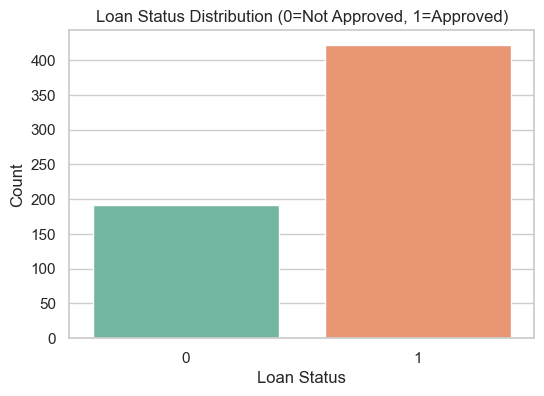

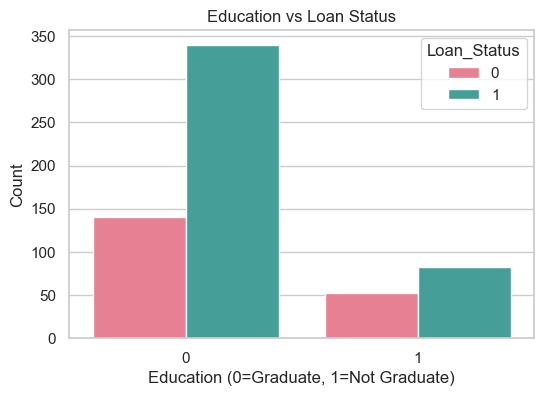

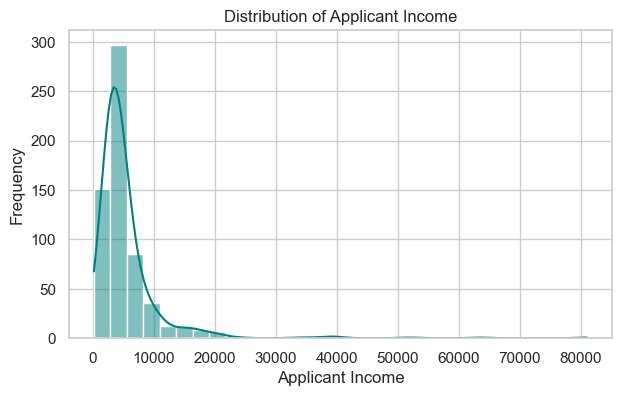

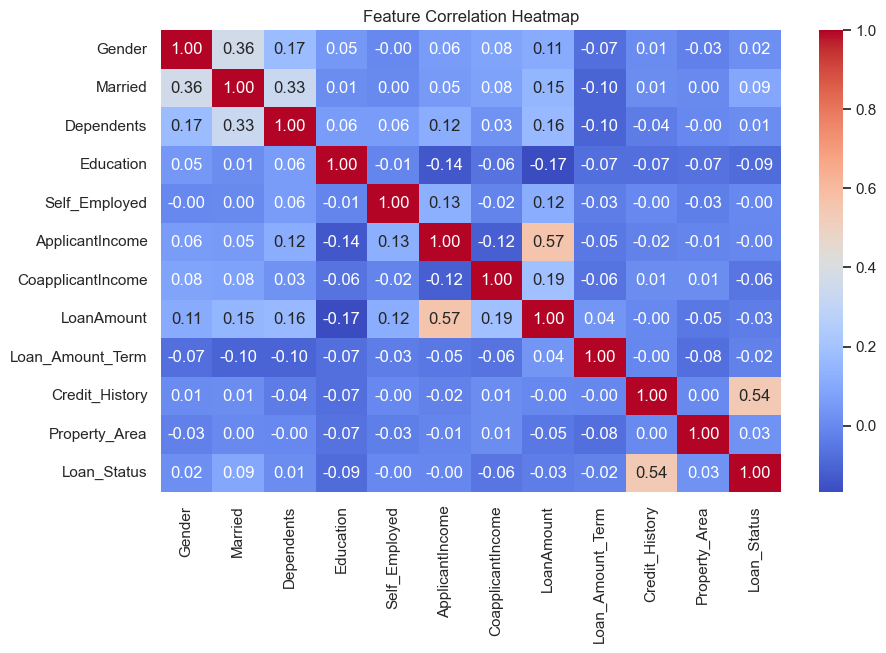

In [16]:
# -----------------------------------
# 🔹 Exploratory Data Analysis (EDA) 
# -----------------------------------

# Loan Status Distribution
plt.figure(figsize=(6,4))
sns.countplot(x="Loan_Status", data=df, hue="Loan_Status", palette="Set2", legend=False)
plt.title("Loan Status Distribution (0=Not Approved, 1=Approved)")
plt.xlabel("Loan Status")
plt.ylabel("Count")
plt.show()

# Education vs Loan Status
plt.figure(figsize=(6,4))
sns.countplot(x="Education", hue="Loan_Status", data=df, palette="husl")
plt.title("Education vs Loan Status")
plt.xlabel("Education (0=Graduate, 1=Not Graduate)")
plt.ylabel("Count")
plt.show()

# Applicant Income Distribution
plt.figure(figsize=(7,4))
sns.histplot(df["ApplicantIncome"], bins=30, kde=True, color="teal")
plt.title("Distribution of Applicant Income")
plt.xlabel("Applicant Income")
plt.ylabel("Frequency")
plt.show()

# Correlation Heatmap
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()


In [20]:
# -----------------------------------
# 🔹 Define Features (X) and Target (y)
# -----------------------------------
X = df.drop(["Loan_ID", "Loan_Status"], axis=1)
y = df["Loan_Status"]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

print("✅ Data split completed.")
print("Training set size:", X_train.shape)
print("Test set size:", X_test.shape)


✅ Data split completed.
Training set size: (460, 11)
Test set size: (154, 11)


In [23]:
# -----------------------------------
# 🔹 Logistic Regression Model 
# -----------------------------------
from sklearn.preprocessing import StandardScaler

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Build and train the model with higher iterations
lr_model = LogisticRegression(max_iter=1000, solver='lbfgs', random_state=42)
lr_model.fit(X_train_scaled, y_train)

# Predictions
y_pred_lr = lr_model.predict(X_test_scaled)

# Evaluation
print("🔹 Logistic Regression Results (Scaled Data):")
print("Accuracy:", round(accuracy_score(y_test, y_pred_lr), 3))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_lr))
print("\nClassification Report:\n", classification_report(y_test, y_pred_lr))


🔹 Logistic Regression Results (Scaled Data):
Accuracy: 0.773

Confusion Matrix:
 [[21 33]
 [ 2 98]]

Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.39      0.55        54
           1       0.75      0.98      0.85       100

    accuracy                           0.77       154
   macro avg       0.83      0.68      0.70       154
weighted avg       0.81      0.77      0.74       154



In [25]:
# -----------------------------------
# 🔹 Decision Tree Classifier
# -----------------------------------
dt_model = DecisionTreeClassifier(max_depth=5, random_state=42)
dt_model.fit(X_train, y_train)

# Predictions
y_pred_dt = dt_model.predict(X_test)

# Evaluation
print("🔹 Decision Tree Results:")
print("Accuracy:", round(accuracy_score(y_test, y_pred_dt), 3))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_dt))
print("\nClassification Report:\n", classification_report(y_test, y_pred_dt))


🔹 Decision Tree Results:
Accuracy: 0.714

Confusion Matrix:
 [[20 34]
 [10 90]]

Classification Report:
               precision    recall  f1-score   support

           0       0.67      0.37      0.48        54
           1       0.73      0.90      0.80       100

    accuracy                           0.71       154
   macro avg       0.70      0.64      0.64       154
weighted avg       0.71      0.71      0.69       154



In [27]:
# -----------------------------------
# 🔹 Model Comparison
# -----------------------------------
accuracy_lr = accuracy_score(y_test, y_pred_lr)
accuracy_dt = accuracy_score(y_test, y_pred_dt)

print(f"Logistic Regression Accuracy: {accuracy_lr:.3f}")
print(f"Decision Tree Accuracy: {accuracy_dt:.3f}")

if accuracy_lr > accuracy_dt:
    print("\n✅ Logistic Regression performs slightly better on this dataset.")
else:
    print("\n✅ Decision Tree performs slightly better on this dataset.")


Logistic Regression Accuracy: 0.773
Decision Tree Accuracy: 0.714

✅ Logistic Regression performs slightly better on this dataset.


In [28]:
# -----------------------------------
# 🔹 Insights & Conclusion
# -----------------------------------
print("📊 Key Insights:")
print("- Applicants with higher income and strong credit history are more likely to have loans approved.")
print("- Education and property area also influence loan decisions.")
print("- Logistic Regression achieved good accuracy and interpretability.")
print("- Decision Tree helps understand feature importance and decision boundaries.")
print("\n✅ Task 2 Completed Successfully!")


📊 Key Insights:
- Applicants with higher income and strong credit history are more likely to have loans approved.
- Education and property area also influence loan decisions.
- Logistic Regression achieved good accuracy and interpretability.
- Decision Tree helps understand feature importance and decision boundaries.

✅ Task 2 Completed Successfully!
